In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import statsmodels as sm

In [2]:
data = pd.ExcelFile("DTSV_data_gaps.xlsx")

In [3]:
data.sheet_names

['Forward Length', 'Backward Length']

In [4]:
fl_data = data.parse('Forward Length')
bl_data = data.parse('Backward Length')
fl_data.head()

,Unnamed: 0,2016-03-18 00:00:00,2016-03-19 00:00:00,2016-03-20 00:00:00,2016-03-21 00:00:00,2016-03-22 00:00:00,2016-03-23 00:00:00,2016-03-24 00:00:00,2016-03-25 00:00:00,2016-03-26 00:00:00,...,2017-10-14 00:00:00,2017-10-15 00:00:00,2017-10-16 00:00:00,2017-10-17 00:00:00,2017-10-18 00:00:00,2017-10-19 00:00:00,2017-10-20 00:00:00,2017-10-21 00:00:00,2017-10-22 00:00:00,2017-10-23 00:00:00
0,Depth (m),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),...,Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C),Temperature (deg C)
1,0.101,1.236,1.052,1.065,0.912,0.936,1.062,0.913,0.838,0.844,...,16.566,16.572,16.685,17.029,16.939,16.914,16.744,16.775,17.288,17.251
2,0.227,1.074,0.973,0.927,0.748,0.818,0.933,0.885,0.809,0.796,...,16.44,16.425,16.78,16.906,16.827,16.887,16.613,16.878,17.134,17.259
3,0.354,1.19,0.914,0.684,0.707,0.85,1.094,0.937,0.869,0.653,...,16.254,16.553,16.601,16.634,16.729,16.821,16.525,16.849,16.99,17.187
4,0.48,1.2,0.907,0.602,0.749,1.048,1.212,0.99,0.982,0.65,...,15.913,16.021,16.255,16.285,16.35,16.417,16.355,16.43,16.788,16.831


In [ ]:
mean_data = fl_data
for i in fl_data.keys():
    for j in range(2935):
        mean_data[i][j + 1] = (fl_data[i][j + 1] + bl_data[i][j + 1])/2
mean_data.head()

In [ ]:
bl_data['Unnamed: 0'][1]

In [ ]:
fl_data.keys()

In [6]:
fl_data_isnan = pd.isna(fl_data)

In [ ]:
fl_data_nan = []
for i in fl_data_isnan.keys():
    if (fl_data_isnan[i][2] == True):
        fl_data_nan.append(i)

In [41]:
fl_data1 = fl_data
del fl_data1['Unnamed: 0']
fl_T = fl_data1.T
del fl_T[0]
fl_T.head()

,1,2,3,4,5,6,7,8,9,10,...,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935
2016-03-18 00:00:00,1.236,1.074,1.19,1.2,0.959,0.881,0.885,0.974,0.962,0.863,...,110.7,110.79,110.59,110.65,110.76,110.64,109.84,106.75,102.69,102.02
2016-03-19 00:00:00,1.052,0.973,0.914,0.907,0.756,0.587,0.69,0.925,0.981,0.817,...,110.56,110.39,110.58,110.74,110.53,110.58,109.68,106.78,102.75,101.84
2016-03-20 00:00:00,1.065,0.927,0.684,0.602,0.803,0.725,0.655,0.826,0.819,0.706,...,110.69,110.47,110.45,110.44,110.68,110.73,109.87,107.09,102.81,101.71
2016-03-21 00:00:00,0.912,0.748,0.707,0.749,0.716,0.694,0.771,0.735,0.847,0.847,...,110.78,110.41,110.65,110.75,110.56,110.58,109.89,107,102.45,101.5
2016-03-22 00:00:00,0.936,0.818,0.85,1.048,1.055,0.732,0.684,0.745,0.955,0.976,...,110.8,110.49,110.49,110.6,110.7,110.7,109.78,106.69,102.65,102.01


In [42]:
fl_T.to_csv('DTSV.csv')

In [5]:
dataset = pd.read_csv('DTSV.csv', index_col=['Unnamed: 0'], parse_dates=['Unnamed: 0'], dayfirst=True)

In [15]:
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935
2016-03-18 00:00:00,1.236,1.074,1.190,1.200,0.959,0.881,0.885,0.974,0.962,0.863,...,110.70,110.79,110.59,110.65,110.76,110.64,109.84,106.75,102.69,102.02
2016-03-19 00:00:00,1.052,0.973,0.914,0.907,0.756,0.587,0.690,0.925,0.981,0.817,...,110.56,110.39,110.58,110.74,110.53,110.58,109.68,106.78,102.75,101.84
2016-03-20 00:00:00,1.065,0.927,0.684,0.602,0.803,0.725,0.655,0.826,0.819,0.706,...,110.69,110.47,110.45,110.44,110.68,110.73,109.87,107.09,102.81,101.71
2016-03-21 00:00:00,0.912,0.748,0.707,0.749,0.716,0.694,0.771,0.735,0.847,0.847,...,110.78,110.41,110.65,110.75,110.56,110.58,109.89,107.00,102.45,101.50
2016-03-22 00:00:00,0.936,0.818,0.850,1.048,1.055,0.732,0.684,0.745,0.955,0.976,...,110.80,110.49,110.49,110.60,110.70,110.70,109.78,106.69,102.65,102.01


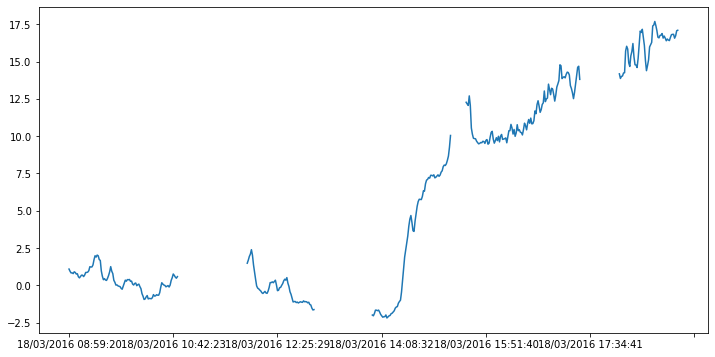

In [15]:
data_1 = dataset['1']
data_1.plot(figsize=(12,6))

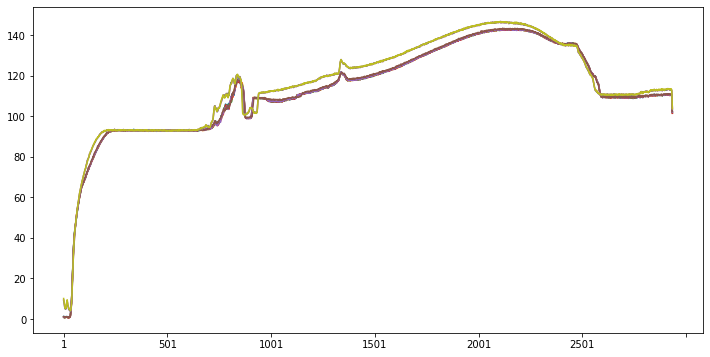

In [35]:
dt_t = dataset.T
dt_t['2016-03-18 00:00:00'].plot(figsize=(12,6))
dt_t['2016-03-19 00:00:00'].plot(figsize=(12,6))
dt_t['2016-03-20 00:00:00'].plot(figsize=(12,6))
dt_t['2016-03-21 00:00:00'].plot(figsize=(12,6))
dt_t['2016-03-22 00:00:00'].plot(figsize=(12,6))
dt_t['2016-04-18 00:00:00'].plot(figsize=(12,6))
dt_t['2017-03-18 00:00:00'].plot(figsize=(12,6))
dt_t['2017-03-18 00:00:00'].plot(figsize=(12,6))
dt_t['2017-03-19 00:00:00'].plot(figsize=(12,6))
dt_t['2017-03-20 00:00:00'].plot(figsize=(12,6))
dt_t['2017-03-21 00:00:00'].plot(figsize=(12,6))

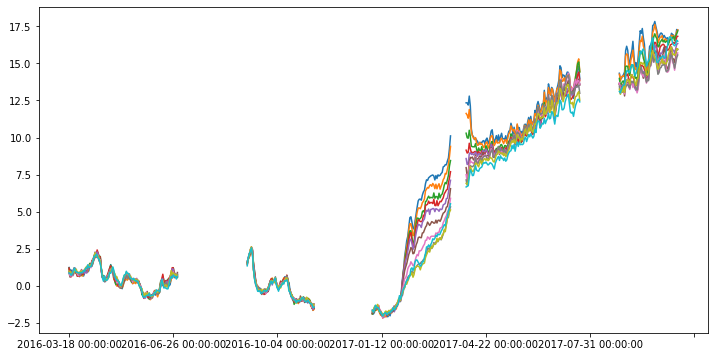

In [14]:
dataset['1'].plot(figsize=(12,6))
dataset['2'].plot(figsize=(12,6))
dataset['3'].plot(figsize=(12,6))
dataset['4'].plot(figsize=(12,6))
dataset['5'].plot(figsize=(12,6))
dataset['6'].plot(figsize=(12,6))
dataset['7'].plot(figsize=(12,6))
dataset['8'].plot(figsize=(12,6))
dataset['9'].plot(figsize=(12,6))
dataset['10'].plot(figsize=(12,6))

In [38]:
itog = data_1.describe()
itog

count    413.000000
mean       5.863667
std        6.477383
min       -2.196000
25%       -0.014000
50%        3.657500
75%       11.687500
max       17.689500
Name: 1, dtype: float64

In [7]:
fl_without_nan = (fl_data.T).dropna()
del fl_without_nan[0]
fl_without_nan.head()

,1,2,3,4,5,6,7,8,9,10,...,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935
Unnamed: 0,0.101,0.227,0.354,0.48,0.607,0.733,0.86,0.986,1.113,1.239,...,370.09,370.21,370.34,370.47,370.59,370.72,370.84,370.97,371.1,371.22
18/03/2016 08:59:20,1.236,1.074,1.19,1.2,0.959,0.881,0.885,0.974,0.962,0.863,...,110.7,110.79,110.59,110.65,110.76,110.64,109.84,106.75,102.69,102.02
18/03/2016 09:00:22,1.052,0.973,0.914,0.907,0.756,0.587,0.69,0.925,0.981,0.817,...,110.56,110.39,110.58,110.74,110.53,110.58,109.68,106.78,102.75,101.84
18/03/2016 09:01:24,1.065,0.927,0.684,0.602,0.803,0.725,0.655,0.826,0.819,0.706,...,110.69,110.47,110.45,110.44,110.68,110.73,109.87,107.09,102.81,101.71
18/03/2016 09:02:26,0.912,0.748,0.707,0.749,0.716,0.694,0.771,0.735,0.847,0.847,...,110.78,110.41,110.65,110.75,110.56,110.58,109.89,107,102.45,101.5


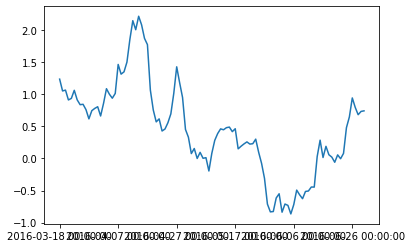

In [56]:
dataset = pd.read_csv('DTSV.csv', index_col=['Unnamed: 0'], parse_dates=['Unnamed: 0'], dayfirst=True)
dataset.rename(columns={'Unnamed: 0':'Day'}, inplace=True)
data = dataset['1'][:105]
data.plot()

In [89]:
data_train = dataset.dropna()
data_train = data_train['1'][:105]
model = sm.tsa.arima.model.ARIMA(np.asarray(data_train), order=(5,1,0), 
                                 dates=np.asarray(data_train.index), freq='D').fit()

                0
count  105.000000
mean     0.007920
std      0.223315
min     -0.688624
25%     -0.129585
50%      0.008276
75%      0.105614
max      1.236000


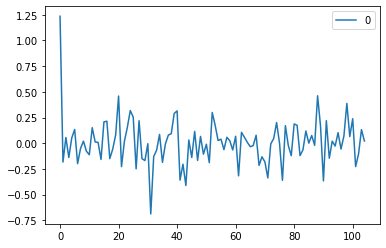

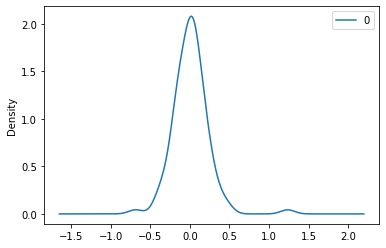

In [90]:
residuals = pd.DataFrame(model.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  26.372
Date:                Mon, 23 Nov 2020   AIC                            -40.744
Time:                        16:07:34   BIC                            -24.878
Sample:                             0   HQIC                           -34.317
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2109      0.106      1.986      0.047       0.003       0.419
ar.L2          0.0908      0.109      0.833      0.405      -0.123       0.304
ar.L3         -0.0103      0.108     -0.095      0.924      -0.222       0.202
ar.L4          0.0130      0.101      0.128      0.898      -0.186       0.212
ar.L5         -0.1073      0.123     -0.869      0.385      -0.349       0.135
sigma2         0.0352      0.004      7.984      0.000       0.027       0.044
===================================================================================
Ljung-Box (Q):                       31.28   Jarque-Bera (JB):                 6.46
Prob(Q):                              0.84   Prob(JB):                         0.04
Heteroskedasticity (H):               0.84   Skew:                            -0.30
Prob(H) (two-sided):                  0.61   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True)
print (pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

       Q-stat   p-value
0    0.336132  0.562071
1    0.365638  0.832919
2    0.547505  0.908338
3    0.570785  0.966254
4    0.991150  0.963276
5    3.868165  0.694512
6    3.890248  0.792328
7    4.142696  0.844025
8    5.041778  0.830651
9    5.079752  0.885787
10   5.090977  0.926681
11   5.619014  0.934057
12   6.277860  0.935453
13   7.452327  0.915867
14   7.998850  0.923829
15   8.017980  0.948329
16   8.961233  0.941470
17   9.220845  0.954405
18   9.229872  0.969463
19  11.704777  0.925863
20  13.257066  0.899353
21  13.390184  0.921705
22  13.391052  0.942994
23  13.728229  0.952552
24  16.813034  0.888463
25  17.128045  0.905164
26  17.251004  0.924748
27  17.506241  0.937909
28  17.520458  0.953466
29  17.528254  0.965682
30  24.801338  0.776533
31  25.600868  0.780985
32  25.905653  0.805474
33  25.982671  0.836115
34  26.277929  0.856063
35  26.290107  0.882313
36  26.297732  0.904885
37  26.318040  0.923659
38  26.682837  0.933010
39  32.456056  0.795974


C:\Users\Nick\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [93]:
output = model.forecast()
print(output)

[0.71602504]


In [94]:
type(model)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

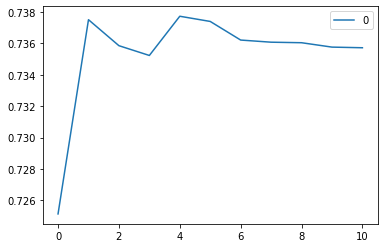

In [145]:
data_test = dataset['1']
pred = pd.DataFrame(model.predict(start=106, end=116))
pred.plot()

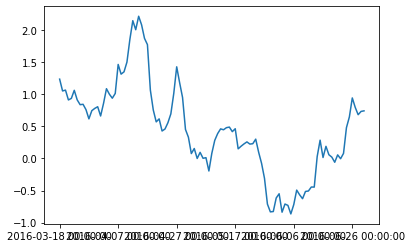

In [146]:
data_train.plot()

In [147]:
data_train2 = dataset['1']
model2 = sm.tsa.arima.model.ARIMA(np.asarray(data_train2), order=(5,1,0), 
                                 dates=np.asarray(data_train.index), freq='D').fit()

In [148]:
pred2 = pd.DataFrame(model2.predict(start=106, end=172))

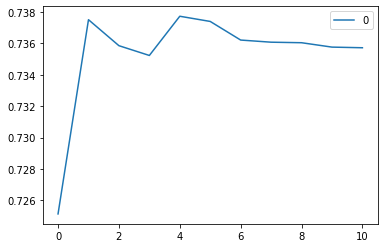

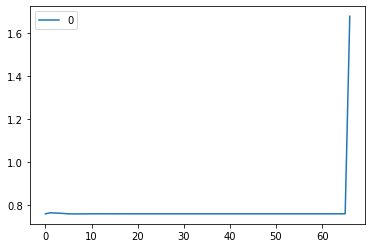

In [149]:
pred.plot()
pred2.plot()

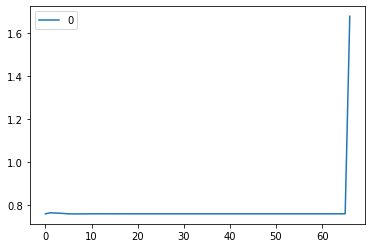

In [150]:
pd.DataFrame(model2.predict(start=106, end=172)).plot()

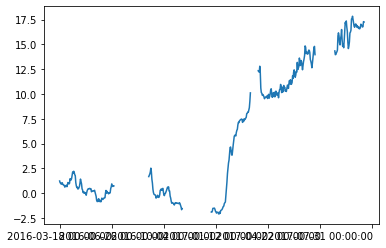

In [151]:
dataset['1'].plot()

In [152]:
data_train3 = dataset['1']
model3 = sm.tsa.arima.model.ARIMA(np.asarray(data_train3), order=(5,1,0), 
                                 dates=np.asarray(data_train.index), freq='D').fit()

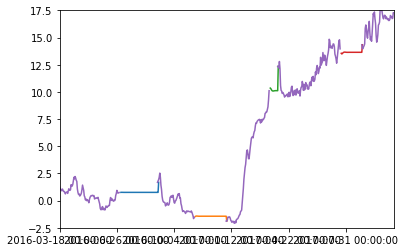

In [157]:
pred3 = pd.DataFrame(model3.predict(start=106, end=172))
x_values=[]
y_values=model3.predict(start=106, end=172)
for i in range(67):
    x_values.append(i + 107)
x_values2=[]
y_values2=model3.predict(start=237, end=292)
for i in range(56):
    x_values2.append(i + 237)
x_values3=[]
y_values3=model3.predict(start=368, end=382)
for i in range(15):
    x_values3.append(i + 368)
x_values4=[]
y_values4=model3.predict(start=492, end=529)
for i in range(38):
    x_values4.append(i + 492)
plt.plot(x_values, y_values)
plt.plot(x_values2, y_values2)
plt.plot(x_values3, y_values3)
plt.plot(x_values4, y_values4)
plt.ylim([-2.5, 17.5])
plt.xlim([0, 585])
dataset['1'].plot()

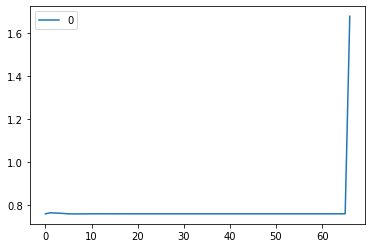

In [140]:
pred3.plot()

In [131]:
pred3-pred2

,0
0,0.036508
1,0.095983
2,-0.033700
3,0.092052
4,0.068335
...,...
62,-0.011850
63,-0.023654
64,-0.027867
65,-0.008990


In [132]:
model3.predict(start=1, end=10) - np.asarray(data_train3[:10])

array([ 1.81937081e-08, -5.59381656e-02, -2.30694567e-02, -2.94069403e-02,
       -1.77616546e-02,  5.85951129e-02, -2.53336026e-02, -3.45878809e-02,
       -3.90186717e-03, -3.16441766e-02])